# **USAGE**

python match_histograms.py --source empire_state_cloudy.png --reference empire_state_sunset.png

**NOTE**: Keep the images empire_state_cloudy.png and empire_state_sunset.png in the same folder as the code.

In [ ]:
# import the necessary packages
from skimage import exposure
import matplotlib.pyplot as plt
import argparse
import cv2

In [ ]:
# construct the argument parser and parse the arguments
ap = argparse.ArgumentParser()
ap.add_argument("-s", "--source", required=True,
                help="path to the input source image")
ap.add_argument("-r", "--reference", required=True,
                help="path to the input reference image")
args = vars(ap.parse_args())

In [ ]:
# load the source and reference images
print("[INFO] loading source and reference images...")
src = cv2.imread(args["source"])
ref = cv2.imread(args["reference"])

In [ ]:
# determine if we are performing multichannel histogram matching
# and then perform histogram matching itself
print("[INFO] performing histogram matching...")
multi = True if src.shape[-1] > 1 else False
matched = exposure.match_histograms(src, ref, multichannel=multi)

In [ ]:
# show the output images
cv2.imshow("Source", src)
cv2.imshow("Reference", ref)
cv2.imshow("Matched", matched)
cv2.waitKey(0)

In [ ]:
# construct a figure to display the histogram plots for each channel
# before and after histogram matching was applied
(fig, axs) = plt.subplots(nrows=3, ncols=3, figsize=(8, 8))

In [ ]:
# loop over our source image, reference image, and output matched
# image
for (i, image) in enumerate((src, ref, matched)):
    # convert the image from BGR to RGB channel ordering
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # loop over the names of the channels in RGB order
    for (j, color) in enumerate(("red", "green", "blue")):
        # compute a histogram for the current channel and plot it
        (hist, bins) = exposure.histogram(image[..., j],
                                          source_range="dtype")
        axs[j, i].plot(bins, hist / hist.max())

        # compute the cumulative distribution function for the
        # current channel and plot it
        (cdf, bins) = exposure.cumulative_distribution(image[..., j])
        axs[j, i].plot(bins, cdf)

        # set the y-axis label of the current plot to be the name
        # of the current color channel
        axs[j, 0].set_ylabel(color)

In [ ]:
# set the axes titles
axs[0, 0].set_title("Source")
axs[0, 1].set_title("Reference")
axs[0, 2].set_title("Matched")

In [ ]:
# display the output plots
plt.tight_layout()
plt.show()

**SAMPLE INPUT**
<br>
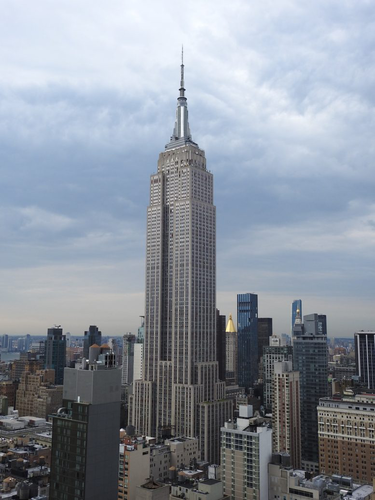

**SAMPLE OUTPUT**
<br>
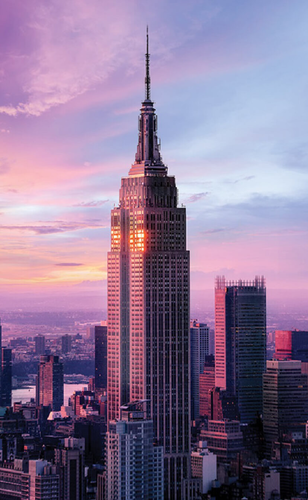
